In [43]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.exist(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    

In [44]:
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = housing_path+'\housing.csv'
    csv_path = os.path.join(HOUSING_PATH, 'housing.csv')
    return pd.read_csv(csv_path)

In [45]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [46]:
print(housing.info())
#查看数据表是否存在丢失的数据：
print('是否有数据丢失：',any(housing.isnull()==True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
是否有数据丢失： True


In [47]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [48]:
# 查看缺少的数据（dataframe中缺少的数据用Nan代替）
housing[np.isnan(housing['total_bedrooms'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


In [49]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


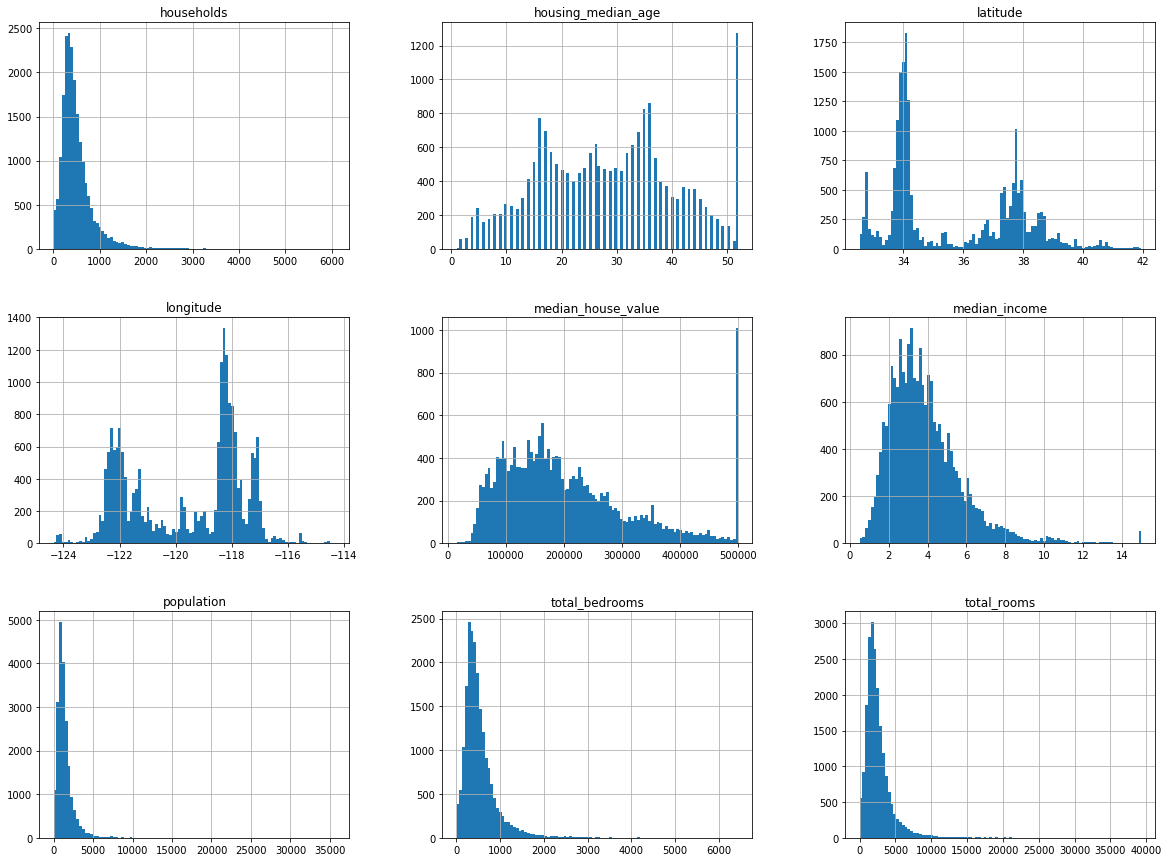

In [50]:
%matplotlib inline 
import matplotlib.pyplot as plt #上一行规定在jupyter内部画图
housing.hist(bins = 100, figsize = (20,15))  #注意20代表figure的宽度
plt.show() #在jupyter中可以不写plt.show()，当cell执行完时会自动调用

In [51]:
# 划分出一个testing set
import numpy as np
def split_train_test(data,test_ration):
    N = data.shape[0]
    #indices = np.random.choice(N, N*test_ration)
    #testing_set = data[indices,:]
    np.random.seed(42)
    shuffled_indices = np.random.permutation(N)
    test_size = int(N*test_ration)
    testing_indices = shuffled_indices[:test_size]
    training_indices = shuffled_indices[test_size:]
    return data.iloc[training_indices],data.iloc[testing_indices]
train_set, test_set = split_train_test(housing,0.2)
print(len(train_set), "trian+", len(test_set), "test")
    

16512 trian+ 4128 test


In [52]:
#预备知识一： pandas 的 apply方法
import hashlib
h1 = housing[:5].reset_index() #加一列‘index’，用作identifier
idx = h1['index']
f1 = lambda x: (hashlib.md5(repr(x).encode('utf-8')).digest())
f2 = lambda x: (hashlib.md5(repr(x).encode('utf-8')).hexdigest())
f = lambda x: (hashlib.md5(repr(x).encode('utf-8')).digest())[-1]
print(idx.apply(f1))
print(idx.apply(f2))
print(idx.apply(f))

0    b'\xcf\xcd \x84\x95\xd5e\xeff\xe7\xdf\xf9\xf9\...
1      b'\xc4\xcaB8\xa0\xb9#\x82\r\xccP\x9aou\x84\x9b'
2    b'\xc8\x1er\x8d\x9dL/co\x06\x7f\x89\xcc\x14\x86,'
3    b'\xec\xcb\xc8~K\\\xe2\xfe(0\x8f\xd9\xf2\xa7\x...
4    b'\xa8\x7f\xf6y\xa2\xf3\xe7\x1d\x91\x81\xa6{uB...
Name: index, dtype: object
0    cfcd208495d565ef66e7dff9f98764da
1    c4ca4238a0b923820dcc509a6f75849b
2    c81e728d9d4c2f636f067f89cc14862c
3    eccbc87e4b5ce2fe28308fd9f2a7baf3
4    a87ff679a2f3e71d9181a67b7542122c
Name: index, dtype: object
0    218
1    155
2     44
3    243
4     44
Name: index, dtype: int64


In [53]:
#预备知识二： pandas 的 loc 与 iloc：loc根据具体的标签名称进行索引，而iloc根据标签位置进行索引
print(h1.iloc[0:2,[0,2]]) # 注意，只索引出来一行，而不是两行数据
print(h1.loc[0:2,['index','latitude']])
h1.loc[1]

   index  latitude
0      0     37.88
1      1     37.86
   index  latitude
0      0     37.88
1      1     37.86
2      2     37.85


index                        1
longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms            1106
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [54]:
def test_set_check(identifier, test_ratio, hash_algorithm):
    return hash_algorithm( repr(identifier).encode('utf-8')).digest()[-1]<256*test_ratio
def train_test_split_by_id(data, test_ratio, id_colum, hash_algorithm = hashlib.md5):
    ids = data['index']
    f = lambda x:test_set_check(x, 0.2, hash_algorithm)
    in_test_set = ids.apply(f)
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = train_test_split_by_id(housing_with_id, 0.2, 'index') #采用row_index作为identifier
print(train_set.shape, test_set.shape)

(16432, 11) (4208, 11)


In [55]:
#实际工作中可以选择更稳定的identifier：
housing_with_id['id']=housing["longitude"] * 1000 + housing["latitude"] #相当于给数据加了一个feature
train_set, test_set = train_test_split_by_id(housing_with_id, 0.2, "id") 
print(train_set.shape, test_set.shape)

(16432, 12) (4208, 12)


In [56]:
#扩展：关于hash的练习
# https://www.liaoxuefeng.com/wiki/001374738125095c955c1e6d8bb493182103fac9270762a000/0013868328251266d86585fc9514536a638f06b41908d44000
# hashlib 提供了常见的摘要算法，如md5。由于摘要函数是一个单向函数，计算f(data)很容易，但通过digest反推data却非常困难
# 摘要算法常用于指出文章是否经过篡改，也可以用于管理用户密码
#练习：通过hashlib来管理用户登录
#注意：①要先将字符串转换为utf-8编码形式，否则汉字等无法被识别
import hashlib
def calc_hash(passwd):
    return hashlib.md5(passwd.encode('utf-8')).hexdigest()
print('许晶晶的hash为：',calc_hash('许晶晶'))
# 假如有三个用户的用户名和密码如下。写一个login函数。
# name    | password
# --------+----------
# michael | 123456
# bob     | abc999
# alice   | alice2008
#首先系统会将用户的密码对应hash值存储在一个数据库中
db = {
    'michael': 'e10adc3949ba59abbe56e057f20f883e',
    'bob': '878ef96e86145580c38c87f0410ad153',
    'alice': '99b1c2188db85afee403b1536010c2c9'
}
def login(username, passwd):
    this_hash = calc_hash(passwd)
    correct_hash = db[username]
    if this_hash != correct_hash:
        print('用户名与密码不匹配。请重新输入：')
    else:
        print('登陆成功！')
login('bob', 'abc999')

许晶晶的hash为： 9f798e57e4988ee8d143d6d025c17aed
登陆成功！


In [57]:
#对采样策略进行改进：假如某个特征对于结果影响很大，如平均收入。则测试集应该保证与平均收入的分布相一致（这在小样本数据集中很重要），否则会导致
#采样偏差
# 注意：要限制catogory的数目，并保证每个catogory样本数都比较多
print(h1['median_income'])
print(np.ceil(h1['median_income']/1.5))
max(np.ceil(h1['median_income']/1.5))


0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64
0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: median_income, dtype: float64


6.0

In [58]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace = True)
housing['income_cat'].value_counts()/len(housing) #整体数据随收入的分布

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set))
# 比较使用随机采样：可见存在较大的采样偏差
from sklearn.model_selection import train_test_split
random_train_set, random_test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
random_test_set['income_cat'].value_counts()/len(random_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [60]:
#注意，划分训练测试集之后要记得移除刚刚添加的‘income_cat’属性，训练时不对原始数据进行修改
for set in (strat_train_set,strat_test_set):
    set.drop(['income_cat'],axis = 1, inplace = True)

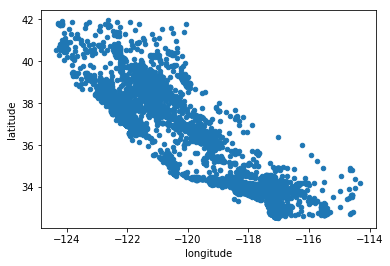

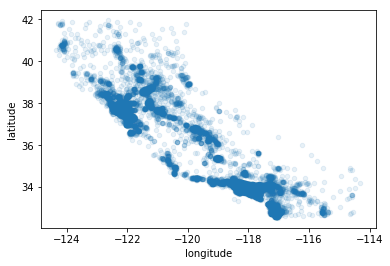

In [61]:
###########################################################################################################################################
###  第二部分：把test set 藏起来，然后visualize and play with train data
#首先copy一份拿来随意把玩
import matplotlib.pyplot as plt 
plt.ion()
hs = strat_train_set.copy()
plt.figure()
hs.plot(kind = 'scatter',x = 'longitude',y = 'latitude')
plt.figure() #显示出点密度较高的区域
hs.plot(kind = 'scatter',x = 'longitude', y = 'latitude',alpha = 0.1)

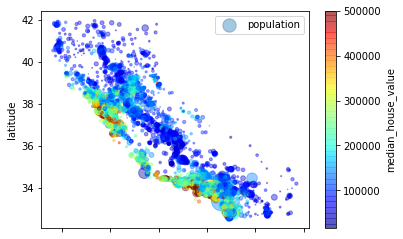

In [62]:
hs.plot(kind = 'scatter',x = 'longitude', y = 'latitude', alpha=0.4, s = hs['population']/100,label ='population', 
       c = 'median_house_value',cmap = plt.get_cmap('jet'),colorbar = True)
plt.legend()
plt.show()


In [63]:
###########################################################################################################################################
####################### 第三部分：寻找feature之间的关联
# 比如，观察其他feature与房价的联系
corr_matrix = hs.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

G:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


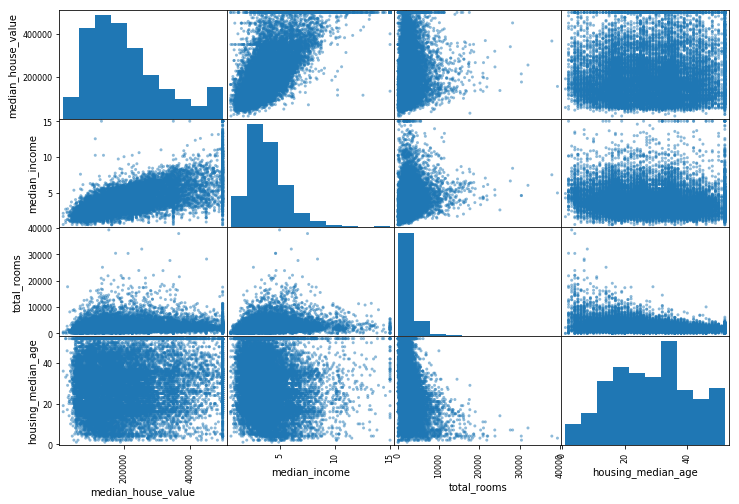

In [64]:
#可以通过pandas来可视化feature之间的correlation
from pandas.tools.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(hs[attributes],figsize = (12,8))
plt.show()

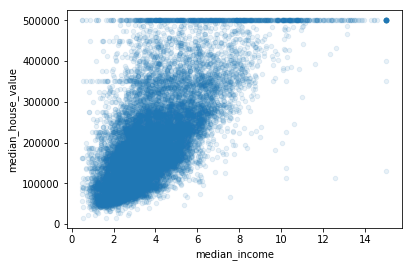

In [65]:
hs.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

In [66]:
# 将某些属性合并为新的属性
hs['rooms_per_houshold'] = hs['total_rooms']/hs['households']
hs['bedrooms_per_room'] = hs['total_bedrooms']/hs['total_rooms']
hs['population_per_houshold'] = hs['population']/hs['households']
attributes = ['median_house_value','rooms_per_houshold','bedrooms_per_room','population_per_houshold']
corr_matrix = hs.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)
# scatter_matrix(hs[attributes],figsize =(15,10))
# plt.show()

median_house_value         1.000000
median_income              0.687160
rooms_per_houshold         0.146285
total_rooms                0.135097
housing_median_age         0.114110
households                 0.064506
total_bedrooms             0.047689
population_per_houshold   -0.021985
population                -0.026920
longitude                 -0.047432
latitude                  -0.142724
bedrooms_per_room         -0.259984
Name: median_house_value, dtype: float64

In [67]:
###########################################################################################################################################
##################################      第四步：编写数据预处理函数  ###################################
housing = strat_train_set.drop("median_house_value",axis = 1)
housing.info()
housing_labels = strat_train_set['median_house_value'].copy()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [68]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [69]:
# 有些特征的数据量可能有丢失。解决这个问题有多种思路，如去除整个feature；或者给丢失的feature增添一些值（零，均值，或中值等）来补全
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
housing_numerical = housing.drop("ocean_proximity",axis = 1)  
imputer.fit(housing_numerical)
print(imputer.statistics_)
print(housing_numerical.median().values)
# transform the training set by replacing missing values by the learned medians：
x = imputer.transform(housing_numerical) #注意：得到的是一个Numpy array类型。可以将其转换回pandas DataFrame的类型：
housing_tr = pd.DataFrame(x, columns = housing_numerical.columns)
housing_tr.info()
# 注意：scikit-learn 可以直接访问estimator的超参数设置，以及训练好的参数值

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [70]:
# 将text 形式的feature映射为数值以便机器学习处理
# fit_trainsform 是将skilearn中的fit 和 transform结合起来写，有时候会更快一些
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_) #查看映射关系

[0 0 4 ... 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [71]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
print(housing_cat_1hot[:5]) #scipy 稀疏矩阵只需存储每个非零元素的位置
#可以将结果转为densed numpy形式
housing_cat_1hot.toarray()

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [72]:
## 可以直接用LabelBinarizer 整合前面两步
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output = True) # 如果不加参数，默认输出的是一个稀疏矩阵
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int32'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [73]:
 # 定义自己的transformers 来combine特定的feature
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y = None):
        return self
    def transform(self, X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:, population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_addr = CombinedAttributesAdder()
attr_addr.transform(housing.values)
        

array([[-121.89, 37.29, 38.0, ..., 4.625368731563422, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, ..., 6.008849557522124, 2.7079646017699117,
        0.15905743740795286],
       [-117.2, 32.77, 31.0, ..., 4.225108225108225, 2.0259740259740258,
        0.24129098360655737],
       ...,
       [-116.4, 34.09, 9.0, ..., 6.34640522875817, 2.742483660130719,
        0.1796086508753862],
       [-118.01, 33.82, 31.0, ..., 5.50561797752809, 3.808988764044944,
        0.19387755102040816],
       [-122.45, 37.77, 52.0, ..., 4.843505477308295, 1.9859154929577465,
        0.22035541195476574]], dtype=object)

In [74]:
#################################################### 第五步：使用pipelines整合多个transformation:##################################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_numerical)

In [76]:
# 进一步整合：将numerical和category类型的feature的transformation全都整合在一起！！！！！！！！！！！！！！！！！！！！！！！！！！！！
#首先定义一个类，用于将pandas的DataFrame转换成Numpy array的形式
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y = None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values
    #由于Binarizer不允许多于两个参数，所以自己定义一个
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.sparse_output = sparse_output
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        enc = LabelBinarizer(sparse_output=self.sparse_output)
        return enc.fit_transform(X)
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_numerical) #返回一个列表，包含所有的数字属性名称
cat_attribs = ['ocean_proximity']
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer', CustomLabelBinarizer()),
])
full_pipeline = FeatureUnion(transformer_list= [
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)
print(housing_prepared.shape) #注意：最终准备好的数据是一个numpy array

[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]
(16512, 16)


In [78]:
pd.DataFrame(housing_prepared)[1:5]  #注意到：最后一列变成了五列（one-hot）形式！

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0


In [34]:
#################################################### 第六步：开始训练 #####################################################
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
some_data = housing.iloc[:10000]
some_labels = housing_labels.iloc[:10000]
some_data_prepared = full_pipeline.fit_transform(some_data)
print('Predictions:\t', lin_reg.predict(some_data_prepared[:10]))
print('Housing_labels:\t',some_labels[:10])
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_prediction,housing_labels)
lin_mse = np.sqrt(lin_mse)
print('均方误差为:\t',lin_mse/10000)

Predictions:	 [210664.29097266 317929.12408419 211108.79574709  59624.6523017
 191348.62429331 154897.84364994 427594.70139324 228673.71136219
 139954.05557862  29111.66750087]
Housing_labels:	 17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
19480    127900.0
8879     500001.0
13685    140200.0
4937      95000.0
4861     500001.0
Name: median_house_value, dtype: float64
均方误差为:	 6.862819819848923


In [35]:
full_pipeline.fit_transform(housing[:10000]).shape

(10000, 16)

In [36]:
#由于上面的结果出现了欠拟合，现使用一个更复杂的模型——决策树
from sklearn.tree import DecisionTreeRegressor
dc_tree = DecisionTreeRegressor()
dc_tree.fit(housing_prepared, housing_labels)
# some_data_prepared = full_pipeline.fit_transform(housing[:10000])
some_prediction = dc_tree.predict(housing_prepared)
some_labels = housing_labels
print('Prediction:\t',some_prediction[:10])
print('Labels:\t',list(some_labels[:10]))
tree_rmse = np.sqrt(mean_squared_error(some_prediction, housing_labels))
# tree_rmse = np.sqrt(mean_squared_error(some_prediction, some_labels))
print('RMSE:\t',tree_rmse)
#注意到这时的误差为零，表明出现了严重的过拟合。为了观察过拟合情况，又不能看到测试集，故需要分出一部分validation set

Prediction:	 [286600. 340600. 196900.  46300. 254500. 127900. 500001. 140200.  95000.
 500001.]
Labels:	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0, 127900.0, 500001.0, 140200.0, 95000.0, 500001.0]
RMSE:	 0.0


In [37]:
################################################ 第七步 Cross-Validation ######################################################
### 注意：求出的socres为一个负值，在求sqrt时要先加负号
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dc_tree, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print('scores: ',scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ',scores.std())
display_scores(rmse_scores)

scores:  [69316.02634772 65498.84994772 71404.25935862 69098.46240168
 70580.30735263 75540.88413124 69717.93143674 70428.42648461
 75888.17618283 68976.12268448]
Mean:  70644.94463282847
Standard deviation:  2938.9378926251234


In [38]:
# 为了比较LinearRegression 和 DecisionTree ，对前者也进行交叉验证
scores_linear_reg = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-scores_linear_reg)
display_scores(lin_rmse_scores)
# 结论：DecisionTree 出现了严重的过拟合，表现不如LinearRegression

scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.6740017983466


In [39]:
# 尝试最后一个模型： Random_ForestRegressor
from sklearn.ensemble import RandomForestRegressor
rand_forest = RandomForestRegressor()
rand_forest.fit(housing_prepared, housing_labels)
some_prediction = rand_forest.predict(housing_prepared)
RMSE_forest = mean_squared_error(some_prediction, housing_labels)
print('随机森林算法的RMSE为：', np.sqrt(RMSE_forest))
rfor_score = cross_val_score(rand_forest, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)
rfor_score = np.sqrt(- rfor_score)
display_scores(rfor_score)
#可见 随机森林算法取得了最好的结果

随机森林算法的RMSE为： 22252.73894310832
scores:  [52869.23106834 49189.93801195 51726.73647871 54995.98190463
 50979.93079904 55978.43765914 52283.7609046  51001.92227546
 54447.35786983 53389.94422283]
Mean:  52686.32411945208
Standard deviation:  1971.265477949874


In [68]:
########################################   第八步  Model Fine Tune ############################################
# 方法一： Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[ 30,35,40],  #为什么有两组？
               'max_features':[6,8,10,12]},
#               {'bootstrap':[False],
#               'n_estimators':[3,10],
#               'max_features':[2,3,4]}    
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_


{'max_features': 6, 'n_estimators': 40}

In [66]:
print(grid_search.best_estimator_)
grid_search.best_params_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=35, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


{'max_features': 8, 'n_estimators': 35}

In [67]:
cv_result = grid_search.cv_results_
for mean_score, params in zip(cv_result['mean_test_score'],cv_result['params']):
    print(np.sqrt(-mean_score), params)

53421.321365161464 {'max_features': 2, 'n_estimators': 20}
52749.54505436019 {'max_features': 2, 'n_estimators': 30}
52722.994619746445 {'max_features': 2, 'n_estimators': 35}
51106.7541405902 {'max_features': 4, 'n_estimators': 20}
50265.84469821046 {'max_features': 4, 'n_estimators': 30}
50556.907085008046 {'max_features': 4, 'n_estimators': 35}
50458.33729499841 {'max_features': 6, 'n_estimators': 20}
50152.42861185615 {'max_features': 6, 'n_estimators': 30}
49989.072069075715 {'max_features': 6, 'n_estimators': 35}
50446.50043389316 {'max_features': 8, 'n_estimators': 20}
49986.9281487723 {'max_features': 8, 'n_estimators': 30}
49786.661838256674 {'max_features': 8, 'n_estimators': 35}


In [54]:
cv_result = grid_search.cv_results_
cv_result #查看cv_reslut_有哪些属性

G:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
G:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
G:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
G:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: Futu

{'mean_fit_time': array([0.06838775, 0.22942467, 0.6890522 , 0.10911059, 0.36876779,
        1.09692464, 0.15162282, 0.50735707, 1.49038329, 0.20275078,
        0.64493017, 1.92895579, 0.11390934, 0.35053959, 0.13817792,
        0.47486238, 0.17507057, 0.5827569 ]),
 'mean_score_time': array([0.00340333, 0.01003561, 0.03028088, 0.00300765, 0.01004295,
        0.02747703, 0.00340228, 0.00963268, 0.0266655 , 0.00341673,
        0.01003351, 0.0268661 , 0.00360861, 0.01122704, 0.00400095,
        0.01104617, 0.00361662, 0.01063418]),
 'mean_test_score': array([-4.17099467e+09, -3.08878889e+09, -2.80437041e+09, -3.68662887e+09,
        -2.77034904e+09, -2.55315408e+09, -3.42145616e+09, -2.72571167e+09,
        -2.49249454e+09, -3.43989513e+09, -2.74253184e+09, -2.51099663e+09,
        -3.90254364e+09, -2.96989972e+09, -3.64258128e+09, -2.74551640e+09,
        -3.49898530e+09, -2.68899000e+09]),
 'mean_train_score': array([-1.11651868e+09, -5.71418344e+08, -4.39609048e+08, -1.01513500e+09,
 

In [57]:
# 当feature space 较大时，使用 Randomized Search
# 显示feature的重要性
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.76067262e-02, 6.27046175e-02, 4.48005827e-02, 1.52235923e-02,
       1.46203927e-02, 1.59222459e-02, 1.49788298e-02, 3.39385319e-01,
       5.04463769e-02, 1.14503753e-01, 9.52978595e-02, 8.21663146e-03,
       1.48665738e-01, 1.05573193e-04, 3.18181409e-03, 4.33994807e-03])

In [63]:
extra_attribs =['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33938531863633703, 'median_income'),
 (0.14866573842263156, 'INLAND'),
 (0.1145037526041284, 'pop_per_hhold'),
 (0.09529785950292048, 'bedrooms_per_room'),
 (0.06760672619513142, 'longitude'),
 (0.06270461748589083, 'latitude'),
 (0.05044637688951596, 'rooms_per_hhold'),
 (0.044800582714063286, 'housing_median_age'),
 (0.015922245928510544, 'population'),
 (0.015223592265490422, 'total_rooms'),
 (0.01497882979260832, 'households'),
 (0.014620392749795147, 'total_bedrooms'),
 (0.00821663146312447, '<1H OCEAN'),
 (0.004339948065897964, 'NEAR OCEAN'),
 (0.0031818140912156538, 'NEAR BAY'),
 (0.00010557319273848823, 'ISLAND')]

In [65]:
########################### 第九步： 测试 ###############################
# 只需 full_pipeline 转换 dataset，然后 evaluate
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value',axis = 1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(final_predictions, y_test)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

51243.53715720181
